## Import Dataset 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('sales_per_store_per_day.csv')

D:\Daniel\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          982644 non-null  int64 
 1   DayOfWeek      982644 non-null  int64 
 2   Date           982644 non-null  object
 3   Sales          982644 non-null  int64 
 4   Customers      982644 non-null  int64 
 5   Open           982644 non-null  int64 
 6   Promo          982644 non-null  int64 
 7   StateHoliday   982644 non-null  object
 8   SchoolHoliday  982644 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 67.5+ MB


In [5]:
df.shape

(982644, 9)

In [6]:
#check for NaN value 
df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
print(f"Total number of stores: {df['Store'].nunique()}\n")
print(f"Total number of customers: {df['Customers'].nunique()}\n")

Total number of stores: 1115

Total number of customers: 4076



#### This dataset should be approached as a time series problem where the target should be the sales 

### Time Series Analysis 

In order to determine some patterns, there are some checks that needs to be performed such as:
   - Stationarity 
   - Trend 
   - Seasonality 

In [8]:
df.Date = pd.to_datetime(df['Date'])

<Figure size 432x288 with 0 Axes>

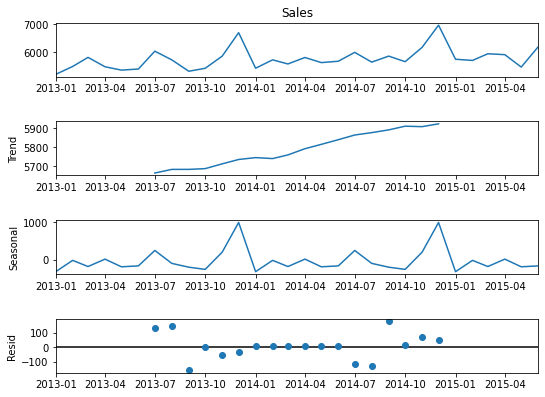

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.width', None)

decomp = df.set_index('Date')
y = decomp['Sales'].resample('MS').mean() 

result = sm.tsa.seasonal_decompose(y, model='additive')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(8, 6)

Some conclusions regarding this decomposition:
   - Trend is increasing over time
   - There is a seasonality - occuring from October to January
   - Series is additive because residuals are decomposing around 0

---

### Day of Week Feature

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

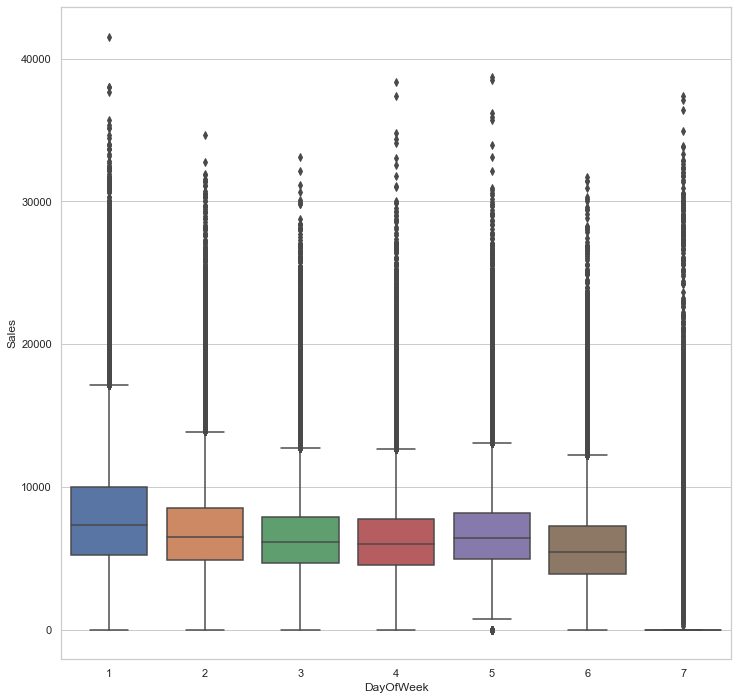

In [10]:
import seaborn as sns # advanced vizs
plt.figure(figsize=(12,12))
sns.set(style="whitegrid")
sns.boxplot(data=df,x="DayOfWeek",y="Sales")

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

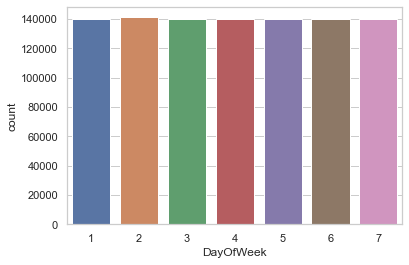

In [11]:
sns.countplot(x='DayOfWeek', data=df)

In [12]:
print(f"total number of unique customers by day of week: {df.groupby('DayOfWeek')['Customers'].nunique()}\n")

total number of unique customers by day of week: DayOfWeek
1    3175
2    3036
3    2930
4    2959
5    2987
6    2996
7    2024
Name: Customers, dtype: int64



##### Here we can observe that Monday is usually the most profitable day in terms of customers whereas Sunday is on the opposite, even the number of unique customers per day are quite the similar 

---

### Promo Feature

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

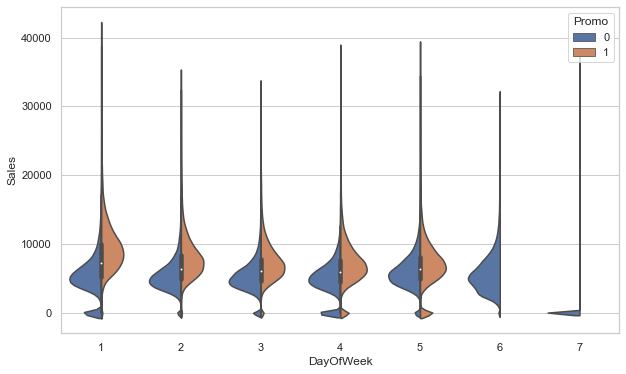

In [13]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.violinplot(x='DayOfWeek',y='Sales',hue='Promo',split=True,data=df)

Here we can observe that there is a slighty increase in sales when Promo == 1, also there are **no promo** on Saturday and Sunday and also the distribution of sales is uniform.

---

### State Holiday Feature

In [14]:
df.StateHoliday.value_counts()

0    886058
0     65536
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [15]:
df["StateHoliday"]=np.where(df["StateHoliday"] == '0' ,0,1)

<AxesSubplot:xlabel='StateHoliday', ylabel='count'>

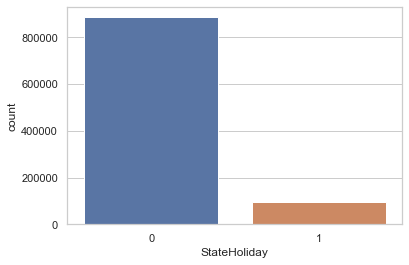

In [16]:
sns.countplot(x='StateHoliday', data=df)

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

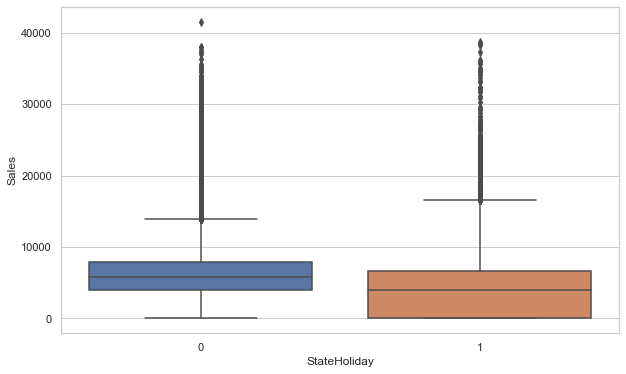

In [17]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.boxplot(x='StateHoliday',y='Sales',data=df)

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

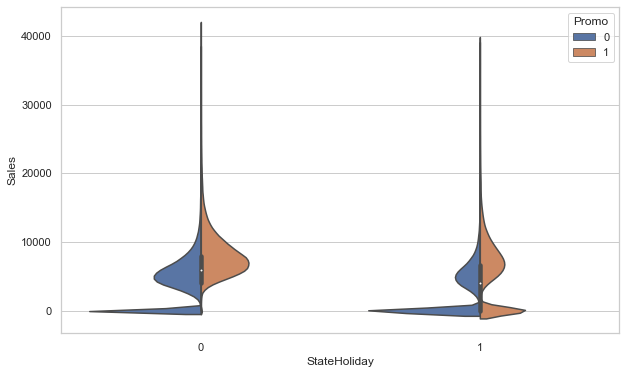

In [18]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.violinplot(x='StateHoliday',y='Sales',hue='Promo',split = True,data=df)

Here we can observe that on holiday the median value of sales is lower than in normal days.

---

### Open Feature

<AxesSubplot:xlabel='Open', ylabel='count'>

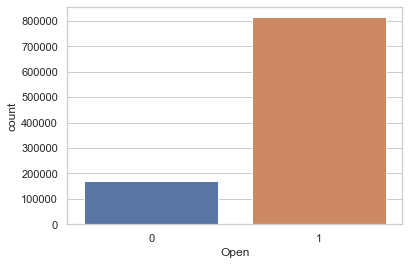

In [19]:
sns.countplot(x='Open', data=df)

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

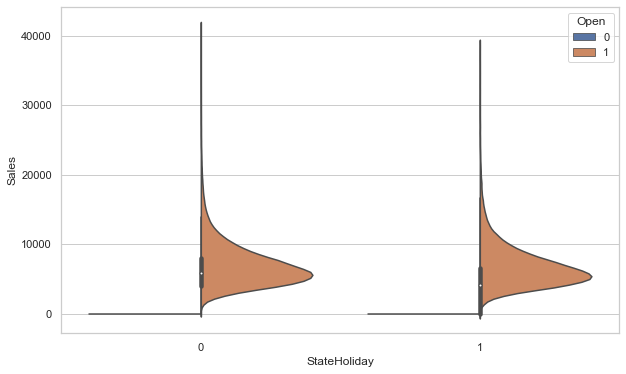

In [20]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.violinplot(x='StateHoliday',y='Sales',hue='Open',split = True,data=df)

From here we can understand that StateHoliday should be highly correlated with Open feature since usually the stores are closed when there is a holiday.

---

### SchoolHoliday Feature

In [21]:
df.SchoolHoliday.value_counts()

0    813700
1    168944
Name: SchoolHoliday, dtype: int64

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

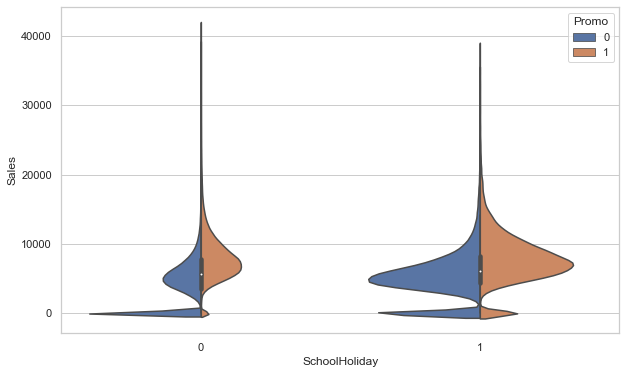

In [22]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.violinplot(x='SchoolHoliday',y='Sales',hue='Promo',split = True,data=df)

When there are School Holidays distributions are different than the 'normal' days

---

### Date Feature

In [23]:
def dt_feat(df):
    df['month'] = df.Date.dt.month
    df['day_of_month'] = df.Date.dt.day
    df['day_of_year'] = df.Date.dt.dayofyear
    df['week_of_year'] = df.Date.dt.weekofyear
    df['day_of_week'] = df.Date.dt.dayofweek + 1
    df['year'] = df.Date.dt.year
    df["is_wknd"] = df.Date.dt.weekday // 4
    df['is_month_start'] = df.Date.dt.is_month_start.astype(int)
    df['is_month_end'] = df.Date.dt.is_month_end.astype(int)
    return df

In [24]:
df = dt_feat(df)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end
0,1,2,2015-06-30,5735,568,1,1,0,0,6,30,181,27,2,2015,0,0,1
1,2,2,2015-06-30,9863,877,1,1,0,0,6,30,181,27,2,2015,0,0,1
2,3,2,2015-06-30,13261,1072,1,1,0,1,6,30,181,27,2,2015,0,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0,6,30,181,27,2,2015,0,0,1
4,5,2,2015-06-30,6635,645,1,1,0,0,6,30,181,27,2,2015,0,0,1


<AxesSubplot:xlabel='month', ylabel='Sales'>

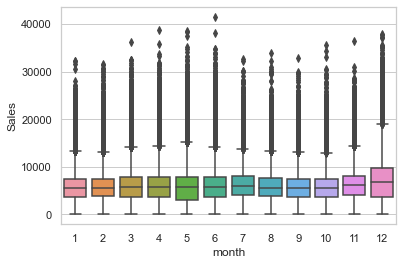

In [25]:
sns.boxplot(x='month', y='Sales', data=df)

<AxesSubplot:xlabel='is_month_start', ylabel='Sales'>

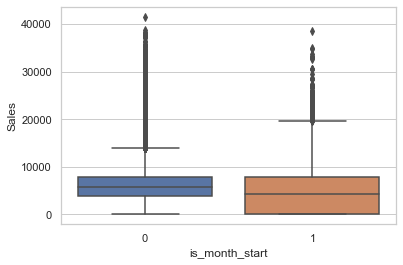

In [26]:
sns.boxplot(x='is_month_start', y='Sales', data=df)

<AxesSubplot:xlabel='is_month_end', ylabel='Sales'>

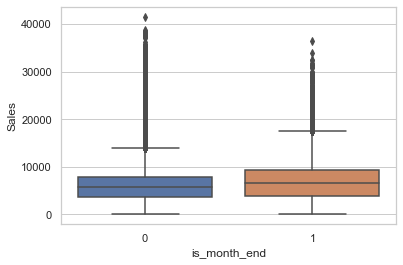

In [27]:
sns.boxplot(x='is_month_end', y='Sales', data=df)

<AxesSubplot:xlabel='is_wknd', ylabel='Sales'>

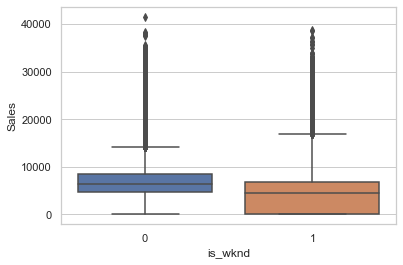

In [28]:
sns.boxplot(x='is_wknd', y='Sales', data=df)

<AxesSubplot:xlabel='year', ylabel='Sales'>

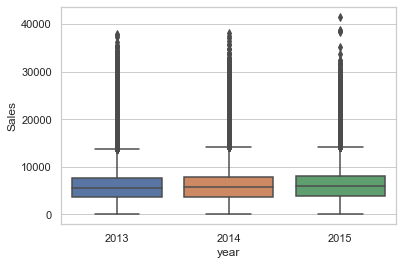

In [29]:
sns.boxplot(x='year', y='Sales', data=df)

Several conclusions can be extracted:
- There are no differences in sales between years;
- Working days are most profitable;
- People tend to buy more in the end on the month;
- December is slighty better month for sales - maybe because of Promotions?

---

## Modelling 

Since from EDA part we saw quite a generous number of outliers, I am going to scale the features with RobustScaler and try a Random Forest Regression because it's usually known that RF take care of outliers.

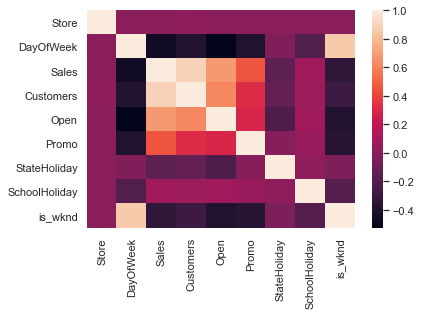

In [30]:
ax = sns.heatmap(df[['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday','is_wknd']].corr())

From Correlation Matrix we can observe that:
- There is a strong pozitive correlation (obvious relationship) between customers and sales;
- There is a strong pozitive correlation (obvious relationship) between Sales and Promotions;

In [31]:
num_columns= df.select_dtypes(exclude=[object]).columns 
num_columns=num_columns.drop(labels=['Sales','Date'])
num_columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'month', 'day_of_month', 'day_of_year', 'week_of_year',
       'day_of_week', 'year', 'is_wknd', 'is_month_start', 'is_month_end'],
      dtype='object')

In [32]:
X = df[num_columns]
y = df.Sales

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
sc_X = RobustScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

I used RobustScaler for the X since features have outliers and RobustScaler is a good scaler to deal with it.

---

## Creating Models 

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [36]:
%%time
lm.fit(X_train,y_train)
print(lm)

LinearRegression()
Wall time: 324 ms


### Evaluation

In [37]:
# print the intercept
print(lm.intercept_)

[-0.2176463]


In [38]:
print(lm.coef_)

[[-1.99908291e-02 -1.13770017e+09  6.34869814e-01  3.83482294e-01
   3.10547196e-01 -6.55217990e-02  8.59499443e-04  1.24981290e+00
   9.18945391e-02 -1.14886130e+00  1.29495934e-02  1.13770017e+09
   3.46808024e-02  1.50302264e-01  2.97522654e-02  1.63218996e-01]]


### Prediction

In [39]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

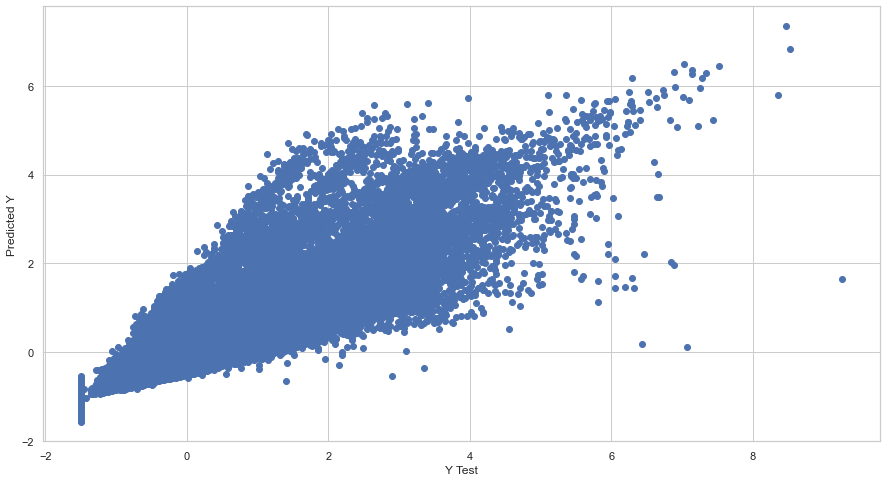

In [40]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

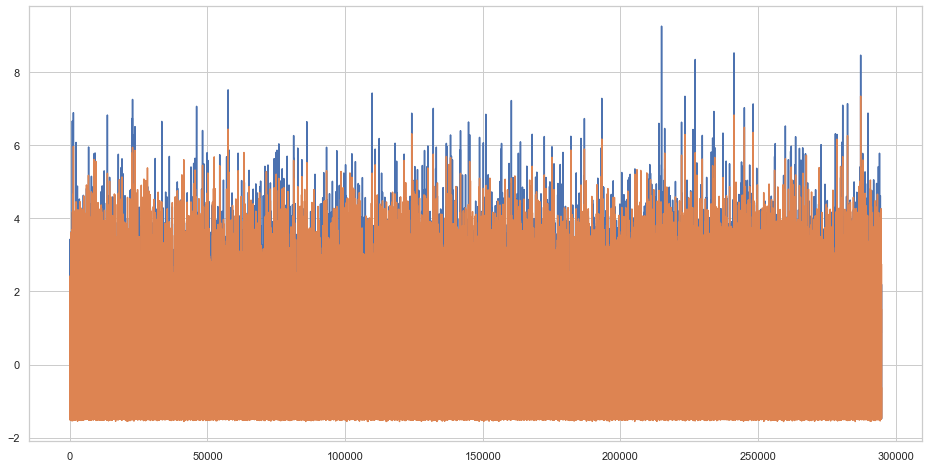

In [41]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

### Evaluation Metrics

In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.26473519060563605
MSE: 0.14747510632087857
RMSE: 0.3840248772161493


---

## GB Regression

In [44]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
%%time
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

Wall time: 2min 9s


GradientBoostingRegressor(learning_rate=0.05, max_depth=4)

### Prediction

In [46]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

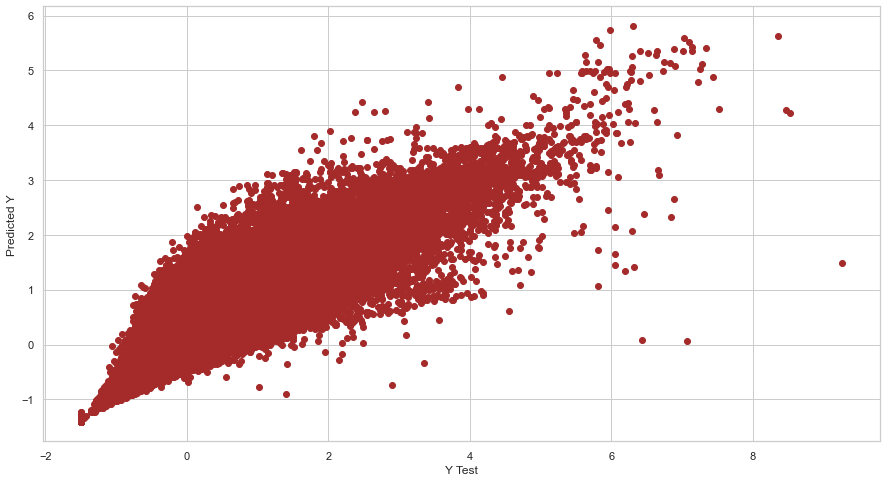

In [47]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

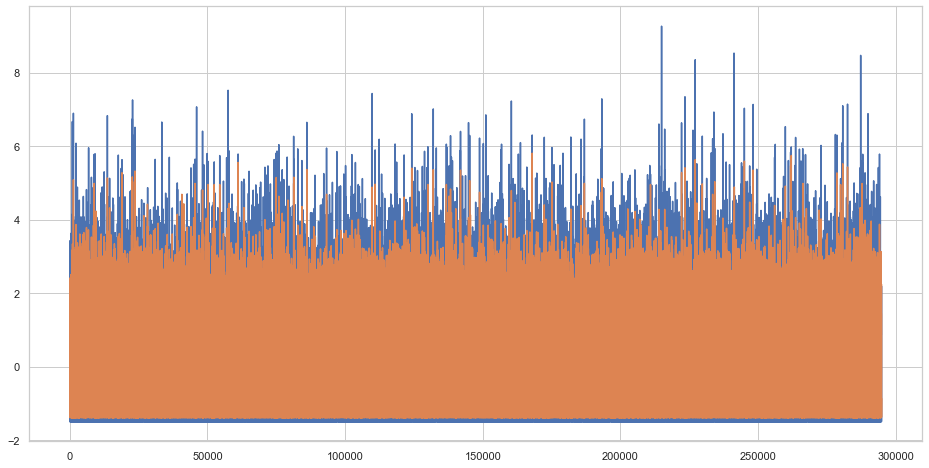

In [48]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(clf_pred, label = 'predict')
plt.show()

### Evaluation Metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.24729406477112484
MSE: 0.1200181902372794
RMSE: 0.34643641586484436


---

## Decision Tree Regression

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

### Prediction 

In [51]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

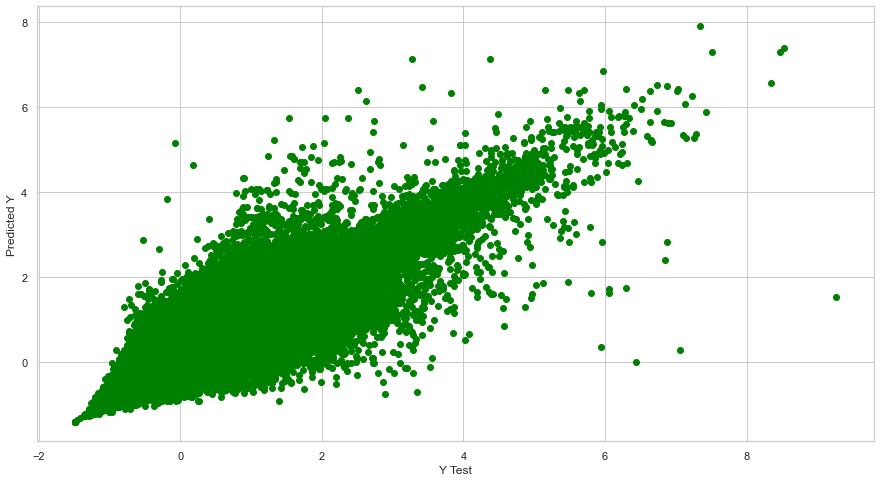

In [52]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

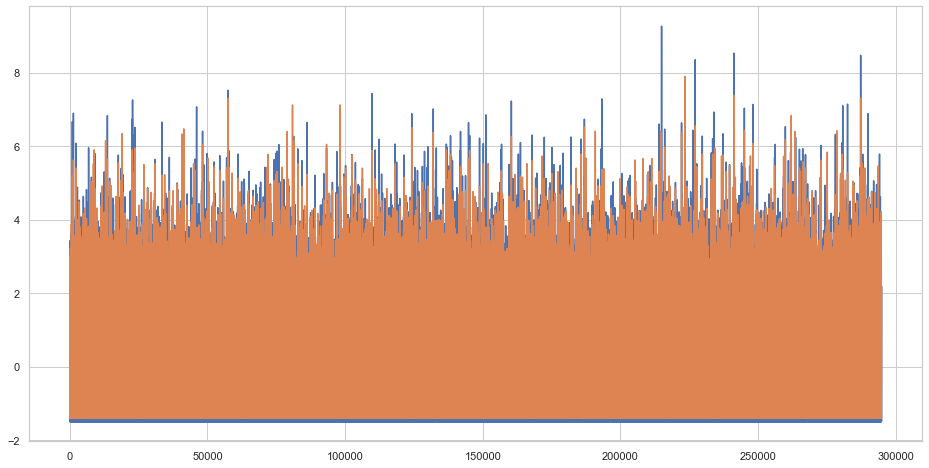

In [53]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(dtr_pred, label = 'predict')
plt.show()

### Evaluation Metrics

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.2025334954310636
MSE: 0.10361134314920627
RMSE: 0.3218871590312454


---

## LightGBM

In [55]:
%%time
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train,y_train)

Wall time: 7.84 s


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9, max_bin=55,
              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=500,
              num_leaves=5, objective='regression')

### Prediction

In [56]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

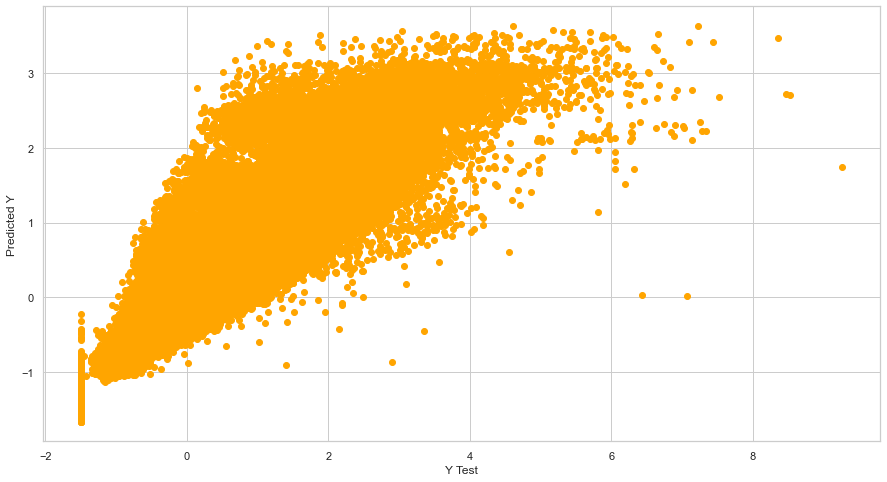

In [57]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

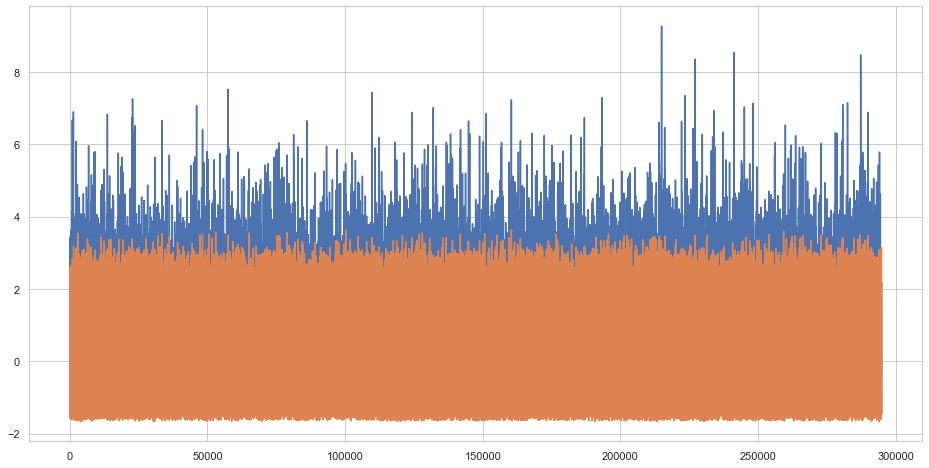

In [58]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(lgb_pred, label = 'predict')
plt.show()

### Evaluation Metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

MAE: 0.24823747575970959
MSE: 0.12750714910221211
RMSE: 0.3570814320322636


--- 

## Model Selection

In [60]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),
                     metrics.mean_squared_error(y_test, clf_pred),
                     metrics.mean_squared_error(y_test, dtr_pred),
                    metrics.mean_squared_error(y_test, lgb_pred)])

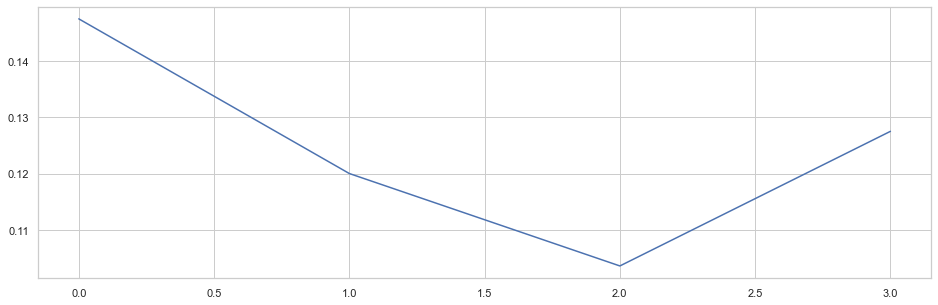

In [61]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

In [62]:
error_rate

array([0.14747511, 0.12001819, 0.10361134, 0.12750715])

#### In theory Decision Trees model obtain the best score in the first iteration of the model. Obviously this is not the end, a Cross Validation is mandatory in order to obtain the best hyperparameters and also an improved model. Due to the lack of time, I will skip this part.

---

In [63]:
dtr_pred = sc_y.inverse_transform(dtr_pred)
dtr_pred

array([[  400.57176891],
       [ 9406.5342133 ],
       [  400.57176891],
       ...,
       [12390.13327477],
       [  400.57176891],
       [  400.57176891]])

### Feature Importance

Feature: 0, Score: 0.08794
Feature: 1, Score: 0.00398
Feature: 2, Score: 0.85774
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.02336
Feature: 5, Score: 0.00037
Feature: 6, Score: 0.00090
Feature: 7, Score: 0.00130
Feature: 8, Score: 0.00560
Feature: 9, Score: 0.00769
Feature: 10, Score: 0.00217
Feature: 11, Score: 0.00529
Feature: 12, Score: 0.00229
Feature: 13, Score: 0.00046
Feature: 14, Score: 0.00011
Feature: 15, Score: 0.00080


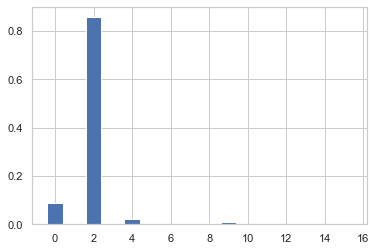

In [64]:
from matplotlib import pyplot
importance = dtreg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### The feature importance provides us the fact that Customers and Promo are the most important features.
#### Obviously if there was been a CV usually the feature importance was more balanced, meaning they would have follow a gradual ratio

In [65]:
!jupyter nbconvert --to html EDA_Models.ipynb

[NbConvertApp] Converting notebook EDA_Models.ipynb to html
[NbConvertApp] Writing 1096768 bytes to EDA_Models.html
